<a href="https://colab.research.google.com/github/reitezuz/18NES1-2025-/blob/main/week1/perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Simple perceptron

- example of basic perceptron model in Python using NumPy.
- the implementation includes both binary (0/1) and bipolar (-1/1) step activation function



In [2]:
import numpy as np

class Perceptron:
    def __init__(self, weights, bias, binary=True):
        self.weights = np.array(weights)
        self.bias = bias
        self.binary = binary

    def activation(self, xi):
        if self.binary:
            return 1 if xi > 0 else 0 if xi < 0 else 0.5
        else:
          return 1 if xi > 0 else -1 if xi < 0 else 0

    def forward(self, inputs):
        potential = np.dot(self.weights, inputs) + self.bias
        return self.activation(potential)

Run the following code to see how the perceptron processes an input:

- try different weight vectors, input vectors or biases and switch between binary and bipolar activation

In [3]:
weights = [1, 1]
bias = 1
inputs = [-1, 1]
binary = False

p = Perceptron(weights, bias, binary)
output = p.forward(inputs)
print(output)

1


### Single-Input Perceptron: Exploring Logical Operations
- set the weight and bias and observe the outputs:

In [8]:
weights = [1]
bias = 0
binary = True

p = Perceptron(weights, bias, binary)

results = []
vals = [0, 1] if binary else [-1, 1]
for x1 in vals:
  inputs = [x1]
  output = p.forward(inputs)
  results.append([x1, output])

# Create a pandas DataFrame for a nice table
import pandas as pd
df = pd.DataFrame(results, columns=["x1", "y"])
df

,x1,y
0,0,0.5
1,1,1.0


###Two-Input Perceptron: Exploring Logical Operations
- set the weights and bias and observe the perceptron outputs:

In [15]:
weights = [1, 1]
bias = 0
binary = False

p = Perceptron(weights, bias, binary)

results = []
vals = [0, 1] if binary else [-1, 1]
for x1 in vals:
    for x2 in vals:
        inputs = [x1, x2]
        output = p.forward(inputs)
        results.append([x1, x2, output])

# Create a pandas DataFrame for a nice table
import pandas as pd
df = pd.DataFrame(results, columns=["x1", "x2", "y"])
df


,x1,x2,y
0,-1,-1,-1
1,-1,1,0
2,1,-1,0
3,1,1,1


### Three-Input Perceptron: Exploring Logical Operations
- set the weights and bias and observe the perceptron outputs:

In [10]:
weights = [1, 1, 1]
bias = -1.5
binary = True

p = Perceptron(weights, bias, binary)

results = []
vals = [0, 1] if binary else [-1, 1]
for x1 in vals:
    for x2 in vals:
        for x3 in vals:
            inputs = [x1, x2, x3]
            output = p.forward(inputs)
            results.append([x1, x2, x3, output])

# Create a pandas DataFrame for a nice table
df = pd.DataFrame(results, columns=["x1", "x2", "x3", "y"])
df


,x1,x2,x3,y
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,1,1
4,1,0,0,0
5,1,0,1,1
6,1,1,0,1
7,1,1,1,1


### Vizualize the decision boundary of a perceptron:

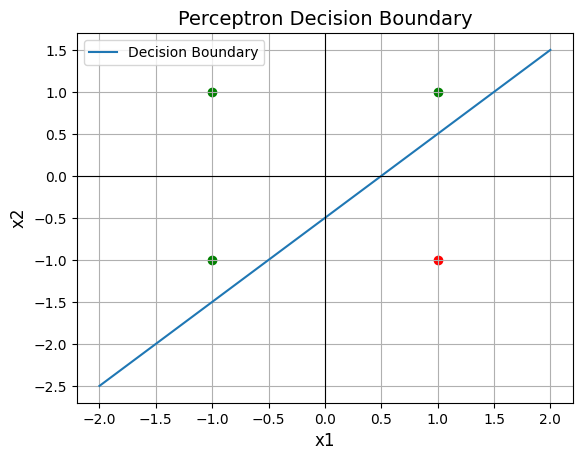

In [17]:
weights = [-1, 1]
bias = 0.5
binary = False

p = Perceptron(weights, bias, binary)

import matplotlib.pyplot as plt
# Generate points for visualization
x = np.linspace(-2, 2, 100)
y = -(p.weights[0] * x + p.bias) / p.weights[1]

# Plot the decision boundary
plt.plot(x, y, label='Decision Boundary')

# Plot the points (optional)
vals = [0, 1] if binary else [-1, 1]
for i in vals:
  for j in vals:
      out = p.forward(np.array([i,j]))
      if out == 1:
        plt.scatter(i, j, color='green')
      else:
        plt.scatter(i,j, color='red')


plt.xlabel('x1', fontsize=12)
plt.ylabel('x2', fontsize=12)
plt.title('Perceptron Decision Boundary', fontsize=14)
plt.grid(True)
plt.legend()

#Highlight x and y axes
plt.axhline(0, color='black', linewidth=0.8)  # x-axis
plt.axvline(0, color='black', linewidth=0.8) # y-axis

plt.show()
